In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from TheCannon import apogee
from TheCannon import model
from TheCannon import dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#wl
wl = np.genfromtxt("spocData/wavelengths_flat.txt") #Shape: (64336,) 
#tr_ID
tr_ID = np.genfromtxt("spocData/star_names.txt",dtype='str',delimiter='\n') #(1201,)
#tr_flux
tr_flux = np.genfromtxt("spocData/fluxes_contdiv_polynomial_all.txt")#(1201, 64336)
#tr_ivar
tr_ivar = np.loadtxt("spocData/ivar_contdiv_polynomial_all.txt") #(1201, 64336)


In [3]:
# tr_label
d = pd.read_csv("spocData/df_all.csv")
d.pop("Unnamed: 0")
d.pop("Unnamed: 0.1")
d.pop("DIR")
d.pop("SIMNAME")
for c in ['CH','NH','OH','NaH','MgH','AlH','SiH','CaH','TiH','VH']:
    d.pop(c)
for i in range(22,40):
    d.pop("Unnamed: {}".format(i))
tr_label = d.to_numpy()

In [4]:
#combined mask
mask = True

if mask==True:
  combined_mask = np.loadtxt('spocData/combined_mask.txt')
  tr_flux = tr_flux*combined_mask
  print('Mask applied')
else:
  print('No mask applied')

Mask applied


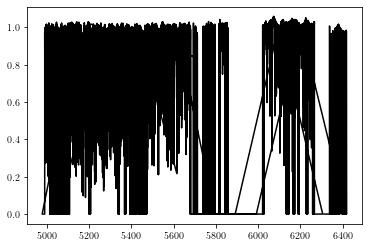

In [5]:
index = np.where(tr_ID=='HD 211080')[0][0]
flux = tr_flux[index]
plt.plot(wl, flux, c='k')
plt.show()

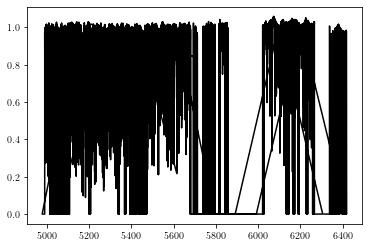

In [6]:
ivar = tr_ivar[index]
choose = ivar > 0
plt.plot(wl[choose], flux[choose], c='k')
plt.show()


In [8]:
#Using the last 10% for testing 
np.random.seed(32)
train_ID, test_ID, tr_flux, test_flux = train_test_split(tr_ID, tr_flux, test_size = 0.05)
np.random.seed(32)
tr_ID2, test_ID2, tr_ivar, test_ivar = train_test_split(tr_ID, tr_ivar, test_size = 0.05)
np.random.seed(32)
tr_ID, test_ID2, tr_label, test_label = train_test_split(tr_ID, tr_label, test_size = 0.05)

In [19]:
ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, test_ID, test_flux, test_ivar)


Loading dataset
This may take a while...


In [30]:
#,'[C/H]','[N/H]','[O/H]','[Na/H]','[Mg/H]','[Ai/H]','[Si/H]','[Ca/H]','[Ti/H]','[V/H]',
ds.set_label_names(['T_{eff}', 'log g','vsini','[Cr/H]','[Mn/H]','[Fe/H]','[Ni/H]','[Y/H]'])

In [31]:
ds.get_plotting_labels()

array(['T_{eff}', 'log g', 'vsini', '[Cr/H]', '[Mn/H]', '[Fe/H]',
       '[Ni/H]', '[Y/H]'], dtype='<U7')

Diagnostic for SNRs of reference and survey objects


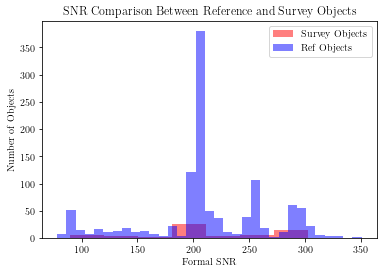

In [32]:
fig = ds.diagnostics_SNR() 

Plotting every label against every other


TypeError: `bins` must be an integer, a string, or an array

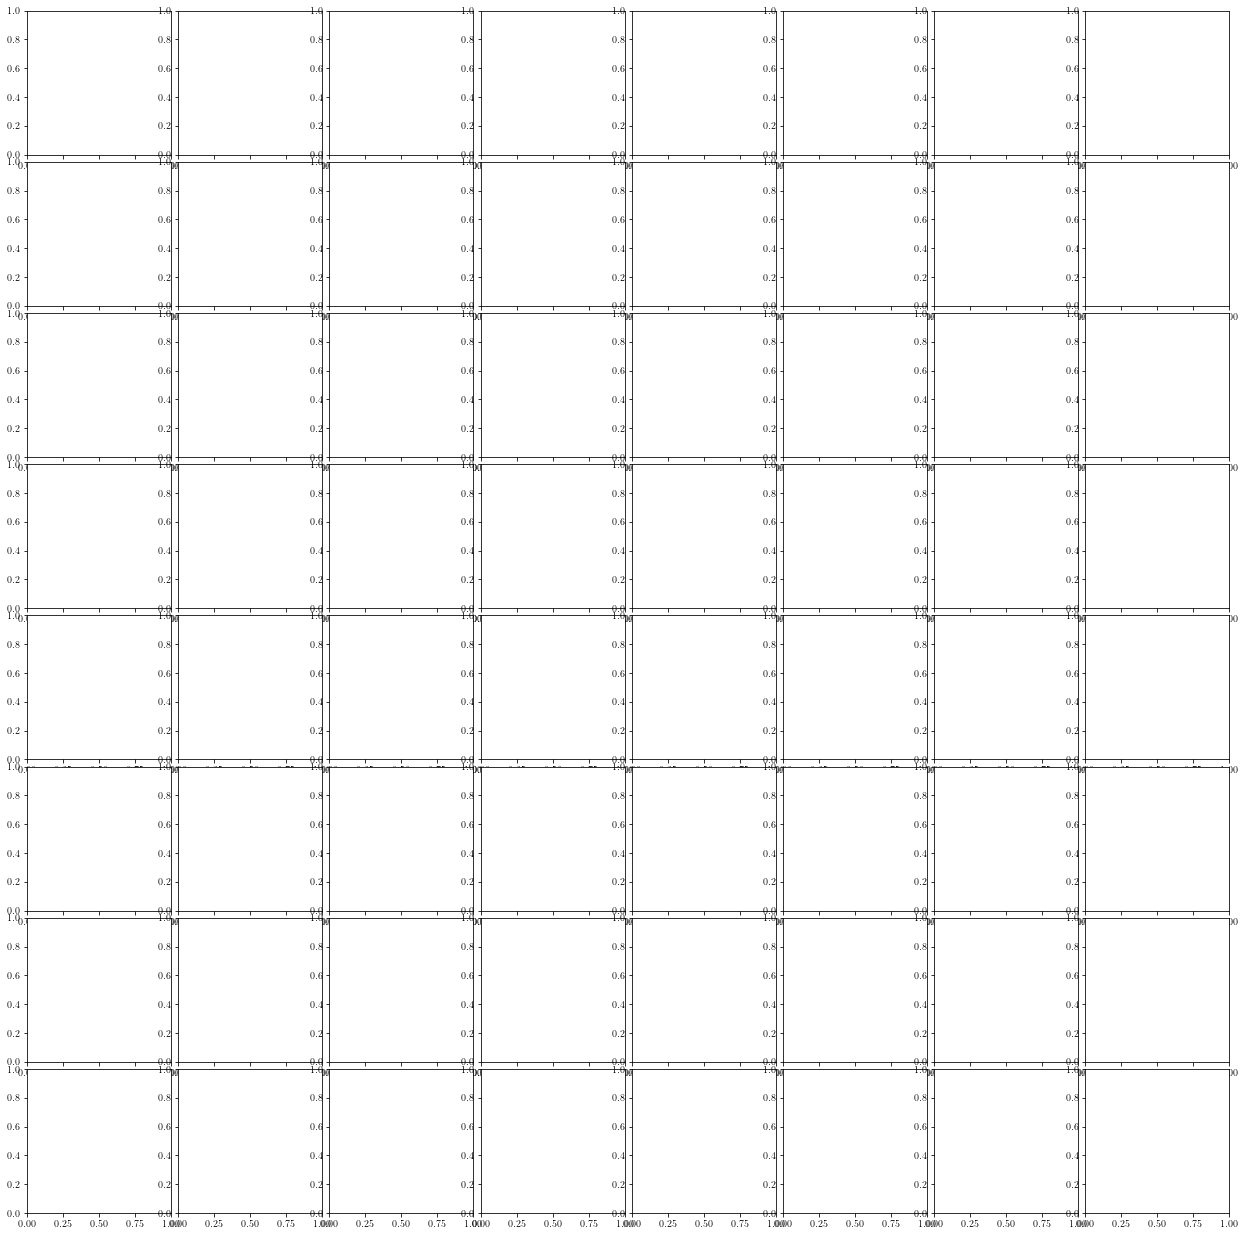

In [33]:
fig = ds.diagnostics_ref_labels()


In [34]:
#To me there aren't any obvious chunks so I'll be creating my own ranges
# minwl= min(wl)
# maxwl = max(wl)
# ninrange = (maxwl-minwl)/3
# ds.ranges = [[int(minwl),int(minwl+ninrange)], [int(minwl+ninrange+1),int(minwl+ninrange*2)], [int(minwl+ninrange*2+1),int(maxwl)]]
#ds.ranges = [[5000,6400]]
ds.ranges= [[min(wl),max(wl)]]

In [12]:
#pseudo_tr_flux, pseudo_tr_ivar = ds.continuum_normalize_training_q(q=0.90, delta_lambda=50)

In [13]:
#contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.2) #Experiment with frac

In [14]:
#ds.set_continuum(contmask)

In [15]:
#cont = ds.fit_continuum(2, "sinusoid")

In [16]:
#norm_tr_flux, norm_tr_ivar, norm_test_flux, norm_test_ivar = ds.continuum_normalize(cont)

In [17]:
#plt.plot(wl, norm_tr_flux[100,:])

In [18]:
# ds.tr_flux = norm_tr_flux
# ds.tr_ivar = norm_tr_ivar
# ds.test_flux = norm_test_flux
# ds.test_ivar = norm_test_ivar

In [35]:
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

Done training model. 


In [36]:
#md.diagnostics_contpix(ds)
md.diagnostics_leading_coeffs(ds)
md.diagnostics_plot_chisq(ds)

Diagnostic plot: leading coeffs and scatters across wavelength.
Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [37]:
label_errs = md.infer_labels(ds)

Inferring Labels


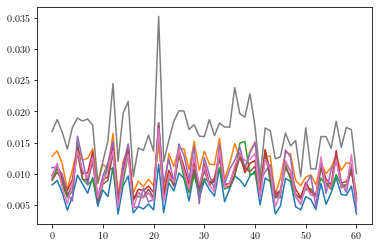

In [38]:
plt.plot(label_errs[0])
plt.show()


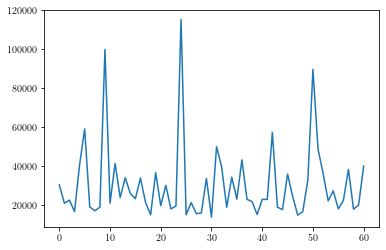

In [39]:
plt.plot(label_errs[1])
plt.show()

In [40]:
test_labels = ds.test_label_vals

In [41]:
prediction = md.predict(ds)

Inferring Labels


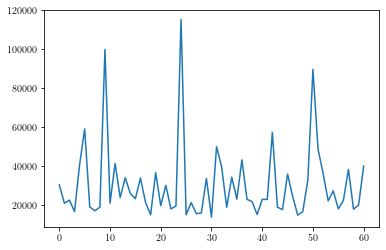

In [42]:
plt.plot(prediction[1])
plt.show()

In [43]:
modelmade = md.model()

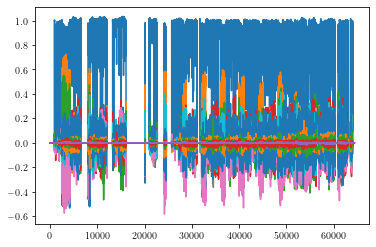

In [44]:
plt.plot(modelmade)

In [45]:
md.infer_spectra(ds)

In [46]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


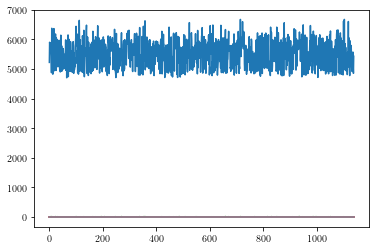

In [47]:
plt.plot(tr_label)
plt.show()